In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#connecting to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#LOADING MODEL TRAINED_MODEL.H5

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#VISUALIZATION AND PERFORMING PREDICTION ON THE SINGLE IMAGE


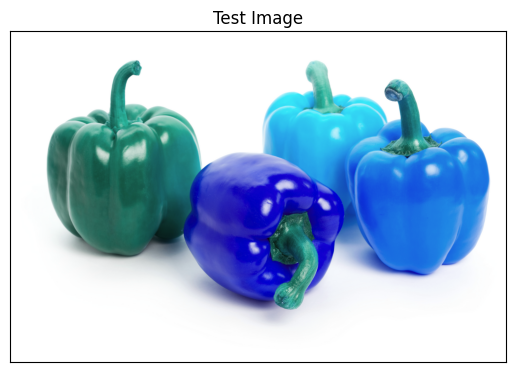

In [ ]:
import cv2
image_path ='/content/drive/MyDrive/DATASET/test/bell pepper/Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


# New Section

#TESTING MODEL


In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


In [ ]:
print(predictions[0])
print(max(predictions[0]))

[2.85042688e-07 2.75096677e-12 6.97857377e-06 9.98870909e-01
 2.08156103e-10 9.64787556e-04 1.02843360e-05 1.07559572e-09
 9.83790258e-08 1.39834064e-08 9.47155465e-10 5.65890934e-09
 8.27563088e-11 1.14358691e-08 1.11181553e-08 2.36174188e-07
 1.13014785e-07 7.33645696e-12 1.69685617e-08 8.33503520e-07
 2.59603139e-09 2.79750942e-08 1.23619344e-07 9.25195653e-09
 1.93276839e-09 8.27151195e-11 5.40107237e-07 1.92745139e-10
 2.87645571e-06 3.26034616e-10 2.13403251e-09 1.92218490e-08
 4.57354901e-08 1.59503588e-06 6.76494860e-10 1.40200485e-04]
0.9988709


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DATASET/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,

)

Found 359 files belonging to 36 classes.


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(predictions[0] == max(predictions[0])) #its a numpy function
print(result_index[0][0])

3


#DISPLAY IMAGE


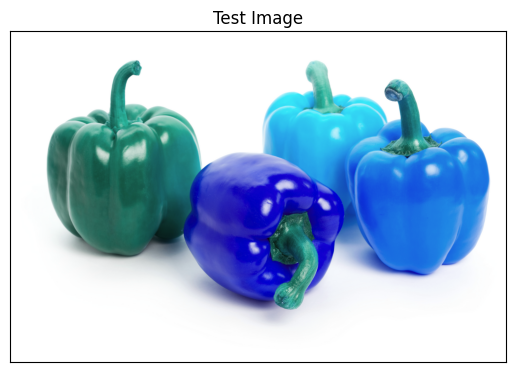

In [ ]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#SINGLE PREDICTION


In [ ]:
print("it's an {}".format(test_set.class_names[result_index[0][0]]))

it's an bell pepper
